# Double Lasso - Using School data



In [3]:
# Install and load necessary packages
install.packages(c("tidyverse", "glmnet", "hdm"))


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library(tidyverse)
library(glmnet)
library(hdm)

In [5]:
# Load the data
url <- "https://raw.githubusercontent.com/gsbDBI/ExperimentData/97a11199ba559f01c7b3803a1493ffa08631732e/School/bruhn2016.csv"
db <- read.csv(url)
# Drop rows with missing values in specific columns and replace dots in column names with underscores
names(db) <- gsub("\\.", "_", names(db))
db <- db %>% drop_na(outcome_test_score, school, failed_at_least_one_school_year, is_female, treatment)



In [6]:
# Display the first few rows of the dataset
head(db)

# Display the summary statistics of the dataset
summary(db)


,outcome_test_score,treatment,school,is_female,mother_attended_secondary_school,father_attened_secondary_school,failed_at_least_one_school_year,family_receives_cash_transfer,has_computer_with_internet_at_home,is_unemployed,has_some_form_of_income,saves_money_for_future_purchases,intention_to_save_index,makes_list_of_expenses_every_month,negotiates_prices_or_payment_methods,financial_autonomy_index
,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,56.67166,1,35002914,1,1,1,0,0,0,1,0,0,48,0,1,56
2,29.07938,0,35908915,1,0,0,0,0,0,0,0,0,42,0,0,27
3,49.56353,1,33047324,1,0,0,0,0,1,0,1,0,50,0,1,31
4,43.09943,0,53012542,1,0,0,0,1,1,0,1,0,93,0,1,77
5,71.32960,0,53006984,1,1,0,0,0,1,1,1,0,52,0,1,43
6,80.06344,0,33049475,1,1,1,0,0,0,0,1,0,50,0,0,31


 outcome_test_score   treatment          school           is_female     
 Min.   : 23.55     Min.   :0.0000   Min.   :17000386   Min.   :0.0000  
 1st Qu.: 47.58     1st Qu.:0.0000   1st Qu.:31068276   1st Qu.:0.0000  
 Median : 59.22     Median :1.0000   Median :33090823   Median :1.0000  
 Mean   : 58.75     Mean   :0.5119   Mean   :32418591   Mean   :0.5576  
 3rd Qu.: 69.60     3rd Qu.:1.0000   3rd Qu.:35019860   3rd Qu.:1.0000  
 Max.   :100.00     Max.   :1.0000   Max.   :53068181   Max.   :1.0000  
                                                                        
 mother_attended_secondary_school father_attened_secondary_school
 Min.   :0.0000                   Min.   :0.0000                 
 1st Qu.:0.0000                   1st Qu.:0.0000                 
 Median :0.0000                   Median :0.0000                 
 Mean   :0.4307                   Mean   :0.3956                 
 3rd Qu.:1.0000                   3rd Qu.:1.0000                 
 Max.   :1.0000     

## OLS

In [7]:
# OLS Models in the paper
modelo1a <- lm(outcome_test_score ~ treatment, data = db)
modelo1b <- lm(outcome_test_score ~ treatment + school, data = db)
modelo1c <- lm(outcome_test_score ~ treatment + school + failed_at_least_one_school_year + is_female, data = db)

In [8]:
# Summarize the OLS models
summary(modelo1a)
summary(modelo1b)
summary(modelo1c)


Call:
lm(formula = outcome_test_score ~ treatment, data = db)

Residuals:
   Min     1Q Median     3Q    Max 
-36.75 -11.07   0.37  10.72  43.50 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  56.4976     0.1682  335.83   <2e-16 ***
treatment     4.3995     0.2351   18.71   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.57 on 15363 degrees of freedom
Multiple R-squared:  0.02228,	Adjusted R-squared:  0.02222 
F-statistic: 350.1 on 1 and 15363 DF,  p-value: < 2.2e-16



Call:
lm(formula = outcome_test_score ~ treatment + school, data = db)

Residuals:
    Min      1Q  Median      3Q     Max 
-36.741 -11.077   0.367  10.717  43.544 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.635e+01  5.142e-01 109.585   <2e-16 ***
treatment   4.398e+00  2.352e-01  18.703   <2e-16 ***
school      4.472e-09  1.505e-08   0.297    0.766    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.57 on 15362 degrees of freedom
Multiple R-squared:  0.02228,	Adjusted R-squared:  0.02216 
F-statistic: 175.1 on 2 and 15362 DF,  p-value: < 2.2e-16



Call:
lm(formula = outcome_test_score ~ treatment + school + failed_at_least_one_school_year + 
    is_female, data = db)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.602 -10.430   0.156  10.191  43.057 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      5.698e+01  5.228e-01 108.981   <2e-16 ***
treatment                        4.480e+00  2.278e-01  19.664   <2e-16 ***
school                          -1.493e-09  1.457e-08  -0.102    0.918    
failed_at_least_one_school_year -7.146e+00  2.524e-01 -28.308   <2e-16 ***
is_female                        2.846e+00  2.302e-01  12.364   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.11 on 15360 degrees of freedom
Multiple R-squared:  0.08357,	Adjusted R-squared:  0.08334 
F-statistic: 350.2 on 4 and 15360 DF,  p-value: < 2.2e-16


## Double LASSO using cross Validation

In [9]:
# Prepare data for Double LASSO
X <- model.matrix(~ school + failed_at_least_one_school_year + is_female, data = db)[, -1]
Y <- db$outcome_test_score
D <- db$treatment

In [10]:
# Double LASSO using glmnet with cross-validation
cv_lasso_Y_W <- cv.glmnet(X, Y, alpha = 1)
cv_lasso_D_W <- cv.glmnet(X, D, alpha = 1)


In [11]:
# Calculate residuals
W_Y_residuals <- Y - predict(cv_lasso_Y_W, X, s = "lambda.min")
W_D_residuals <- D - predict(cv_lasso_D_W, X, s = "lambda.min")

In [12]:
# OLS of the residuals
ols_model_cv <- lm(W_Y_residuals ~ W_D_residuals)
summary(ols_model_cv)



Call:
lm(formula = W_Y_residuals ~ W_D_residuals)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.530 -10.427   0.153  10.194  43.008 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -7.300e-14  1.138e-01    0.00        1    
W_D_residuals  4.480e+00  2.278e-01   19.67   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.11 on 15363 degrees of freedom
Multiple R-squared:  0.02456,	Adjusted R-squared:  0.02449 
F-statistic: 386.7 on 1 and 15363 DF,  p-value: < 2.2e-16


## Double Lasso using theorical Lambda

In [33]:
#Set theorical lambda
theorical_lambda <- 0.68
lasso_Y_W <- rlasso(Y ~ ., data = as.data.frame(cbind(Y, X)), lambda = theorical_lambda)
W_Y_residuals <- residuals(lasso_Y_W)
lasso_D_W <- rlasso(D ~ ., data = as.data.frame(cbind(D, X)), lambda = theorical_lambda)
W_D_residuals <- residuals(lasso_D_W)

In [34]:
# OLS of the residuals
ols_model_lambda <- lm(W_Y_residuals ~ W_D_residuals)
summary(ols_model_lambda)


Call:
lm(formula = W_Y_residuals ~ W_D_residuals)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.619 -10.426   0.133  10.201  43.166 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -2.287e-16  1.138e-01    0.00        1    
W_D_residuals  4.475e+00  2.277e-01   19.66   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.11 on 15363 degrees of freedom
Multiple R-squared:  0.02453,	Adjusted R-squared:  0.02447 
F-statistic: 386.3 on 1 and 15363 DF,  p-value: < 2.2e-16


## Double Lasso using partialling out

In [25]:
double_lasso_po <- rlassoEffect(x = X, y = Y, d = D, method = "partialling out")
summary(double_lasso_po)

[1] "Estimates and significance testing of the effect of target variables"
     Estimate. Std. Error t value Pr(>|t|)    
[1,]    4.4747     0.2277   19.66   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



In [35]:
# Create DataFrame with results
table_1c <- data.frame(
  Method = "OLS",
  Coefficient = coef(modelo1c)[2],
  Std_Error = summary(modelo1c)$coefficients[2, 2],
  Conf_Interval_Lower = confint(modelo1c)[2, 1],
  Conf_Interval_Upper = confint(modelo1c)[2, 2]
)
table_2 <- data.frame(
  Method = "LASSO_CV",
  Coefficient = coef(ols_model_cv)[2],
  Std_Error = summary(ols_model_cv)$coefficients[2, 2],
  Conf_Interval_Lower = confint(ols_model_cv)[2, 1],
  Conf_Interval_Upper = confint(ols_model_cv)[2, 2]
)

table_3 <- data.frame(
  Method = "LASSO_lambda",
  Coefficient = coef(ols_model_lambda)[2],
  Std_Error = summary(ols_model_lambda)$coefficients[2, 2],
  Conf_Interval_Lower = confint(ols_model_lambda)[2, 1],
  Conf_Interval_Upper = confint(ols_model_lambda)[2, 2]
)

table_4 <- data.frame(
  Method = "LASSO_direct",
  Coefficient = double_lasso_po$alpha,
  Std_Error = double_lasso_po$se[1],
  Conf_Interval_Lower = double_lasso_po$alpha - 1.96 * double_lasso_po$se[1],
  Conf_Interval_Upper = double_lasso_po$alpha + 1.96 * double_lasso_po$se[1]
)

combined <- rbind(table_1c,table_2, table_3, table_4)
combined

,Method,Coefficient,Std_Error,Conf_Interval_Lower,Conf_Interval_Upper
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
treatment,OLS,4.480004,0.2278275,4.033435,4.926573
W_D_residuals,LASSO_CV,4.480011,0.2278078,4.033481,4.926541
W_D_residuals1,LASSO_lambda,4.474674,0.2276535,4.028446,4.920901
1,LASSO_direct,4.474674,0.2276535,4.028473,4.920874


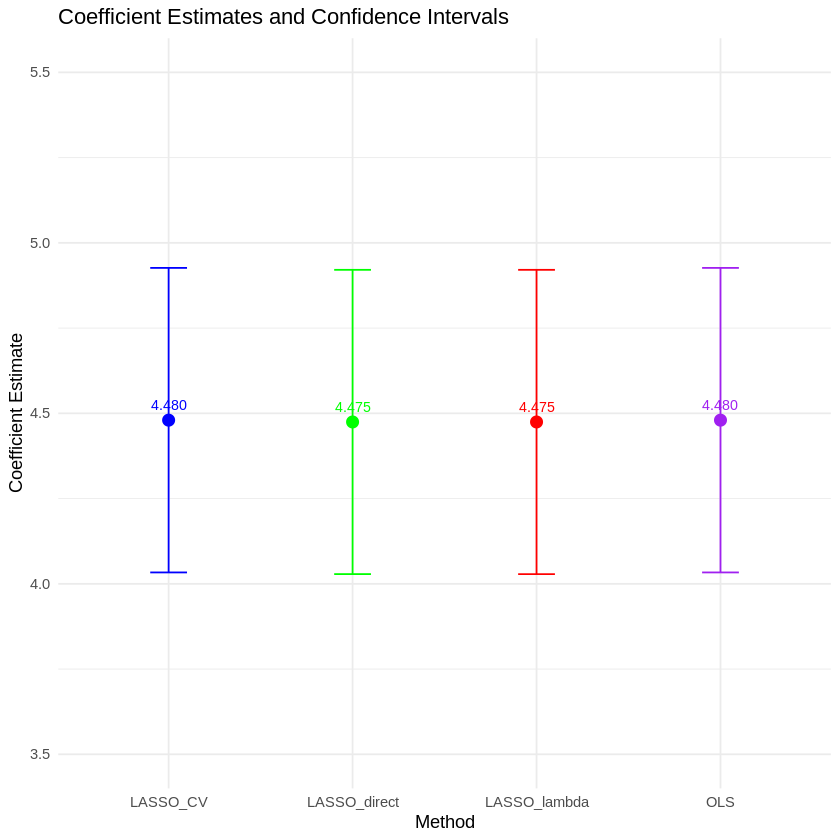

In [37]:
# Visualize the results
ggplot(combined, aes(x = Method, y = Coefficient, color = Method)) +
  geom_errorbar(aes(ymin = Conf_Interval_Lower, ymax = Conf_Interval_Upper), width = 0.2) +
  geom_point(size = 3) +
  geom_text(aes(label = sprintf("%.3f", Coefficient)), vjust = -1, size = 3) +
  theme_minimal() +
  labs(title = "Coefficient Estimates and Confidence Intervals",
       x = "Method",
       y = "Coefficient Estimate") +
  geom_hline(yintercept = 0, linetype = "dashed") +
  scale_color_manual(values = c("blue", "green", "red", "purple")) +
  theme(legend.position = "none") +
  coord_cartesian(ylim = c(3.5, 5.5))